In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

C:\Users\User\AppData\Local\Temp\ipykernel_16928\4044750817.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


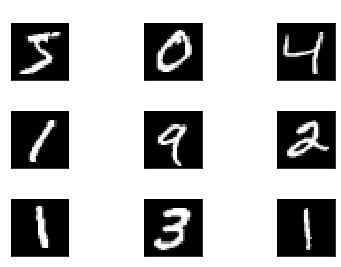

In [4]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]), color = 'white')
  plt.xticks([])
  plt.yticks([])
fig.show()

In [5]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [6]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [7]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)




Epoch 1/20
469/469 - 7s - loss: 0.2487 - accuracy: 0.9249 - val_loss: 0.1004 - val_accuracy: 0.9673 - 7s/epoch - 14ms/step
Epoch 2/20
469/469 - 5s - loss: 0.1001 - accuracy: 0.9693 - val_loss: 0.0797 - val_accuracy: 0.9761 - 5s/epoch - 11ms/step
Epoch 3/20
469/469 - 5s - loss: 0.0732 - accuracy: 0.9769 - val_loss: 0.0710 - val_accuracy: 0.9772 - 5s/epoch - 11ms/step
Epoch 4/20
469/469 - 6s - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0689 - val_accuracy: 0.9783 - 6s/epoch - 13ms/step
Epoch 5/20
469/469 - 7s - loss: 0.0466 - accuracy: 0.9853 - val_loss: 0.0704 - val_accuracy: 0.9782 - 7s/epoch - 15ms/step
Epoch 6/20
469/469 - 5s - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.0715 - val_accuracy: 0.9789 - 5s/epoch - 11ms/step
Epoch 7/20
469/469 - 6s - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.0623 - val_accuracy: 0.9819 - 6s/epoch - 13ms/step
Epoch 8/20
469/469 - 7s - loss: 0.0297 - accuracy: 0.9896 - val_loss: 0.0649 - val_accuracy: 0.9813 - 7s/epoch - 14ms/step
Epoch 9/20
469/4

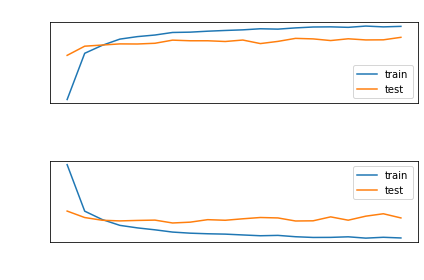

In [11]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy', color ='white')
plt.ylabel('accuracy', color ='white')
plt.xlabel('epoch', color ='white')
plt.legend(['train', 'test'], loc='lower right')
plt.tick_params(colors='white', which='both')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss', color ='white')
plt.ylabel('loss', color ='white')
plt.xlabel('epoch', color ='white')
plt.legend(['train', 'test'], loc='upper right')
plt.tick_params(colors='white', which='both')

plt.tight_layout()

#fig

In [12]:
mnist_model = load_model('/results/keras_mnist.h5 ')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0784 - accuracy: 0.9846 - 825ms/epoch - 3ms/step
Test Loss 0.07839569449424744
Test Accuracy 0.9846000075340271


A fenti kódot [innen](https://nextjournal.com/gkoehler/digit-recognition-with-keras) másoltam, a továbbiakban ennek a paramétereit változtatom.

In [18]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [20]:
history = model.fit(X_train, Y_train,
          batch_size=64, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Epoch 1/10
938/938 - 9s - loss: 0.2229 - accuracy: 0.9320 - val_loss: 0.1080 - val_accuracy: 0.9668 - 9s/epoch - 10ms/step
Epoch 2/10
938/938 - 11s - loss: 0.1006 - accuracy: 0.9686 - val_loss: 0.0783 - val_accuracy: 0.9749 - 11s/epoch - 11ms/step
Epoch 3/10
938/938 - 11s - loss: 0.0728 - accuracy: 0.9769 - val_loss: 0.0865 - val_accuracy: 0.9729 - 11s/epoch - 12ms/step
Epoch 4/10
938/938 - 10s - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0757 - val_accuracy: 0.9796 - 10s/epoch - 10ms/step
Epoch 5/10
938/938 - 10s - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.0671 - val_accuracy: 0.9804 - 10s/epoch - 11ms/step
Epoch 6/10
938/938 - 8s - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.0675 - val_accuracy: 0.9822 - 8s/epoch - 9ms/step
Epoch 7/10
938/938 - 8s - loss: 0.0394 - accuracy: 0.9872 - val_loss: 0.0674 - val_accuracy: 0.9818 - 8s/epoch - 9ms/step
Epoch 8/10
938/938 - 9s - loss: 0.0342 - accuracy: 0.9885 - val_loss: 0.0712 - val_accuracy: 0.9811 - 9s/epoch - 9ms/step
Epoch 9/10


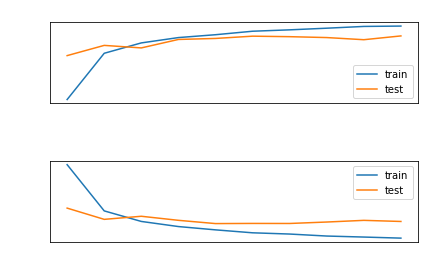

In [21]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy', color ='white')
plt.ylabel('accuracy', color ='white')
plt.xlabel('epoch', color ='white')
plt.legend(['train', 'test'], loc='lower right')
plt.tick_params(colors='white', which='both')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss', color ='white')
plt.ylabel('loss', color ='white')
plt.xlabel('epoch', color ='white')
plt.legend(['train', 'test'], loc='upper right')
plt.tick_params(colors='white', which='both')

plt.tight_layout()

In [22]:
mnist_model = load_model('/results/keras_mnist.h5 ')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0727 - accuracy: 0.9824 - 1s/epoch - 4ms/step
Test Loss 0.07271850109100342
Test Accuracy 0.9824000000953674


A batch size-ot, és az epoch-ot is a felére vettem. A tanulási folyamat nem lett sokkal gyorsabb, ellenben egy kicsit pontatlanabb eredményt kaptunk. Ennek oka, hogy habár a nagyobb batch size-zal elvileg pontosabb adatokat kapnánk, csak 10 epoch-ot futtatunk, így az eredmény pontatlanabb.

In [27]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [29]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Epoch 1/20
469/469 - 15s - loss: 0.3011 - accuracy: 0.9062 - val_loss: 0.1459 - val_accuracy: 0.9570 - 15s/epoch - 31ms/step
Epoch 2/20
469/469 - 13s - loss: 0.1329 - accuracy: 0.9609 - val_loss: 0.1025 - val_accuracy: 0.9686 - 13s/epoch - 28ms/step
Epoch 3/20
469/469 - 14s - loss: 0.0982 - accuracy: 0.9712 - val_loss: 0.1021 - val_accuracy: 0.9707 - 14s/epoch - 30ms/step
Epoch 4/20
469/469 - 12s - loss: 0.0842 - accuracy: 0.9757 - val_loss: 0.0816 - val_accuracy: 0.9775 - 12s/epoch - 26ms/step
Epoch 5/20
469/469 - 13s - loss: 0.0679 - accuracy: 0.9805 - val_loss: 0.0770 - val_accuracy: 0.9796 - 13s/epoch - 27ms/step
Epoch 6/20
469/469 - 13s - loss: 0.0642 - accuracy: 0.9811 - val_loss: 0.0884 - val_accuracy: 0.9774 - 13s/epoch - 29ms/step
Epoch 7/20
469/469 - 15s - loss: 0.0554 - accuracy: 0.9839 - val_loss: 0.0768 - val_accuracy: 0.9804 - 15s/epoch - 31ms/step
Epoch 8/20
469/469 - 12s - loss: 0.0516 - accuracy: 0.9851 - val_loss: 0.0825 - val_accuracy: 0.9818 - 12s/epoch - 26ms/step


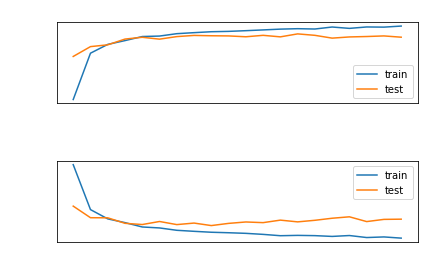

In [30]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy', color ='white')
plt.ylabel('accuracy', color ='white')
plt.xlabel('epoch', color ='white')
plt.legend(['train', 'test'], loc='lower right')
plt.tick_params(colors='white', which='both')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss', color ='white')
plt.ylabel('loss', color ='white')
plt.xlabel('epoch', color ='white')
plt.legend(['train', 'test'], loc='upper right')
plt.tick_params(colors='white', which='both')

plt.tight_layout()

In [31]:
mnist_model = load_model('/results/keras_mnist.h5 ')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 3s - loss: 0.0971 - accuracy: 0.9797 - 3s/epoch - 11ms/step
Test Loss 0.09707126766443253
Test Accuracy 0.9797000288963318


Ebben a verzióban 3 új, egyforma réteget adtam a modellhez. Ekkor a tanulási idő jelentősen megnőtt, és valamivel pontosabb eredményt is kaptunk. Ennek oka, hogy a plusz rétegekkel még több feature-t tudunk kiemelni, viszont fennáll az overfitting esélye.

In [32]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('elu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('elu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [33]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Epoch 1/20
469/469 - 8s - loss: 0.3155 - accuracy: 0.9053 - val_loss: 0.1608 - val_accuracy: 0.9500 - 8s/epoch - 16ms/step
Epoch 2/20
469/469 - 7s - loss: 0.1604 - accuracy: 0.9510 - val_loss: 0.1186 - val_accuracy: 0.9616 - 7s/epoch - 16ms/step
Epoch 3/20
469/469 - 6s - loss: 0.1150 - accuracy: 0.9636 - val_loss: 0.0892 - val_accuracy: 0.9718 - 6s/epoch - 12ms/step
Epoch 4/20
469/469 - 6s - loss: 0.0921 - accuracy: 0.9709 - val_loss: 0.0968 - val_accuracy: 0.9701 - 6s/epoch - 13ms/step
Epoch 5/20
469/469 - 5s - loss: 0.0795 - accuracy: 0.9741 - val_loss: 0.0818 - val_accuracy: 0.9757 - 5s/epoch - 12ms/step
Epoch 6/20
469/469 - 7s - loss: 0.0709 - accuracy: 0.9774 - val_loss: 0.0722 - val_accuracy: 0.9784 - 7s/epoch - 14ms/step
Epoch 7/20
469/469 - 7s - loss: 0.0613 - accuracy: 0.9801 - val_loss: 0.0889 - val_accuracy: 0.9746 - 7s/epoch - 15ms/step
Epoch 8/20
469/469 - 7s - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0715 - val_accuracy: 0.9772 - 7s/epoch - 14ms/step
Epoch 9/20
469/4

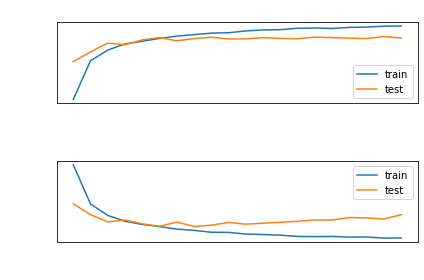

In [35]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy', color ='white')
plt.ylabel('accuracy', color ='white')
plt.xlabel('epoch', color ='white')
plt.legend(['train', 'test'], loc='lower right')
plt.tick_params(colors='white', which='both')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss', color ='white')
plt.ylabel('loss', color ='white')
plt.xlabel('epoch', color ='white')
plt.legend(['train', 'test'], loc='upper right')
plt.tick_params(colors='white', which='both')

plt.tight_layout()

In [36]:
mnist_model = load_model('/results/keras_mnist.h5 ')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.1179 - accuracy: 0.9779 - 1s/epoch - 4ms/step
Test Loss 0.11791828274726868
Test Accuracy 0.9779000282287598


Ebben a változatban az aktivációs függvényt kicseréltem ELU-ra. Ekkor a futási idő jelentősen megnőtt, az ELU-ban található exponenciális miatt, ráadásul a pontosság sem nőtt a RELU-s változathoz képest. Ennek oka, hogy ehhez a problémához nem az ELU passzol.

In [37]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [40]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')

In [43]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/20
469/469 - 5s - loss: 0.1705 - accuracy: 0.9508 - val_loss: 0.1418 - val_accuracy: 0.9566 - 5s/epoch - 11ms/step
Epoch 2/20
469/469 - 4s - loss: 0.1676 - accuracy: 0.9516 - val_loss: 0.1384 - val_accuracy: 0.9585 - 4s/epoch - 9ms/step
Epoch 3/20
469/469 - 4s - loss: 0.1610 - accuracy: 0.9530 - val_loss: 0.1348 - val_accuracy: 0.9601 - 4s/epoch - 9ms/step
Epoch 4/20
469/469 - 4s - loss: 0.1557 - accuracy: 0.9551 - val_loss: 0.1315 - val_accuracy: 0.9602 - 4s/epoch - 9ms/step
Epoch 5/20
469/469 - 4s - loss: 0.1526 - accuracy: 0.9553 - val_loss: 0.1283 - val_accuracy: 0.9613 - 4s/epoch - 9ms/step
Epoch 6/20
469/469 - 4s - loss: 0.1490 - accuracy: 0.9571 - val_loss: 0.1265 - val_accuracy: 0.9616 - 4s/epoch - 9ms/step
Epoch 7/20
469/469 - 4s - loss: 0.1453 - accuracy: 0.9578 - val_loss: 0.1236 - val_accuracy: 0.9623 - 4s/epoch - 9ms/step
Epoch 8/20
469/469 - 4s - loss: 0.1441 - accuracy: 0.9583 - val_loss: 0.1211 - val_accuracy: 0.9632 - 4s/epoch - 9ms/step
Epoch 9/20
469/469 - 4s

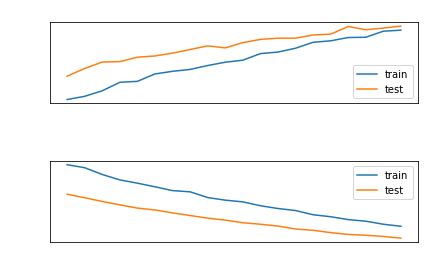

In [44]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy', color ='white')
plt.ylabel('accuracy', color ='white')
plt.xlabel('epoch', color ='white')
plt.legend(['train', 'test'], loc='lower right')
plt.tick_params(colors='white', which='both')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss', color ='white')
plt.ylabel('loss', color ='white')
plt.xlabel('epoch', color ='white')
plt.legend(['train', 'test'], loc='upper right')
plt.tick_params(colors='white', which='both')

plt.tight_layout()

In [45]:
mnist_model = load_model('/results/keras_mnist.h5 ')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 2s - loss: 0.0991 - accuracy: 0.9690 - 2s/epoch - 6ms/step
Test Loss 0.0991121307015419
Test Accuracy 0.968999981880188


Ebben a változatban az optimizer-t adam helyett gradient descent-re változtattam. A futási időt lecsökkentettük ugyan, de vele együtt a pontosság is csökkent egy keveset. Ennek oka, hogy a gradient descent egy konstans learning rate-et használ, míg az adam adaptívat.